In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from scipy import stats

# Import API key
from config import gkey

In [7]:
df = pd.read_csv("../../Output/2_zomato_csv/Zomato_Restaurants_All_Consolidated-Types.csv")
df

,Unnamed: 0,Name,Aggregate Rating,Type,Price,Latitude,Longitude,Sensor ID,Sensor
0,0,Soul Cafe,3.0,Cafe,3,-37.813075,144.965281,1,Bourke Street Mall (North)
1,1,Song Tea,3.5,Beverages,1,-37.813810,144.965600,1,Bourke Street Mall (North)
2,2,Sensory Lab - Bourke Street,3.4,Cafe,2,-37.813398,144.964499,1,Bourke Street Mall (North)
3,3,SamSam,4.0,Restaurant,3,-37.812885,144.965210,1,Bourke Street Mall (North)
4,4,Boost Juice,3.7,Beverages,1,-37.813798,144.965849,1,Bourke Street Mall (North)
...,...,...,...,...,...,...,...,...,...
100,115,The Borek Bakehouse,4.4,Bakery,1,-37.807711,144.960005,26,QV Market-Elizabeth St (West)
101,116,Chickcha,3.7,Cafe,2,-37.809073,144.961767,26,QV Market-Elizabeth St (West)
102,117,Damiao Panda Fan 大妙火锅 · 川菜,3.0,Restaurant,3,-37.809614,144.961199,26,QV Market-Elizabeth St (West)
103,118,Mansae Korean BBQ & Bar,4.5,Restaurant,4,-37.809563,144.959607,26,QV Market-Elizabeth St (West)


In [8]:
# get unique types 
types = df["Type"].unique()
types.sort()
types

array(['Bakery', 'Bar', 'Beverages', 'Cafe', 'Desserts', 'Fast Food',
       'Pub', 'Restaurant'], dtype=object)

In [9]:
# Filter dataframe based on sensor locations
sensor_1_loc = df.loc[df["Sensor"] == "Bourke Street Mall (North)",:]
sensor_2_loc = df.loc[df["Sensor"] == "Flinders St-Spark La",:]
sensor_3_loc = df.loc[df["Sensor"] == "QV Market-Elizabeth St (West)",:]

# Count the number of eatery types per location and save as a dataframe
sensor_1 = pd.DataFrame(sensor_1_loc["Type"].value_counts()).sort_index().reset_index()
sensor_2 = pd.DataFrame(sensor_2_loc["Type"].value_counts()).sort_index().reset_index()
sensor_3 = pd.DataFrame(sensor_3_loc["Type"].value_counts()).sort_index().reset_index()


In [10]:
# confirm that dataframe is saved with eatery types and count
sensor_1

,index,Type
0,Bakery,1
1,Beverages,7
2,Cafe,9
3,Desserts,1
4,Restaurant,14


In [11]:
# merge the above dataframes on the Types to show each location in one dataframe. 
merge_1 = pd.merge(sensor_1,sensor_2, how="outer", on="index")
merge = pd.merge(merge_1,sensor_3, how="outer", on="index")
merge = merge.rename(columns={"Type_x":"Bourke Street Mall (North)",
                              "Type_y":"Flinders St-Spark La",
                              "Type":"QV Market-Elizabeth St (West)"
                             }).fillna(0)
sensors_df = merge.sort_values(by="index")
sensors_df

,index,Bourke Street Mall (North),Flinders St-Spark La,QV Market-Elizabeth St (West)
0,Bakery,1.0,0.0,2.0
5,Bar,0.0,2.0,1.0
1,Beverages,7.0,2.0,5.0
2,Cafe,9.0,12.0,4.0
3,Desserts,1.0,1.0,1.0
6,Fast Food,0.0,2.0,0.0
7,Pub,0.0,0.0,1.0
4,Restaurant,14.0,17.0,23.0


In [12]:
# set x axis for future plots
x_axis = sensors_df["index"].tolist()
x_axis

['Bakery',
 'Bar',
 'Beverages',
 'Cafe',
 'Desserts',
 'Fast Food',
 'Pub',
 'Restaurant']

In [13]:
# Set the eatery types as the index and then 
# transpose the merged dataframe based on location
sensors = sensors_df.set_index("index")
sensors_transposed = sensors.T

# Create two separate dataframes: one for daytime eatery types and one for nighttime types
sensors_day = sensors_transposed[["Bakery","Beverages","Cafe","Fast Food"]]
sensors_night = sensors_transposed[["Bar","Desserts","Pub","Restaurant"]]

# Test to confirm dataframe successfully created
sensors_day

index,Bakery,Beverages,Cafe,Fast Food
Bourke Street Mall (North),1.0,7.0,9.0,0.0
Flinders St-Spark La,0.0,2.0,12.0,2.0
QV Market-Elizabeth St (West),2.0,5.0,4.0,0.0


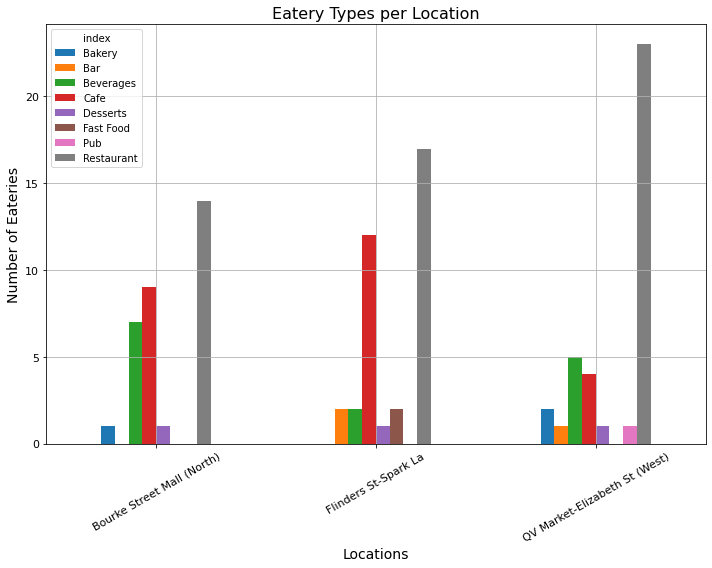

In [14]:
# Create a grouped bar chart to compare all types on a single graph
count_chart = sensors_transposed.plot(kind='bar',rot=30,fontsize=11, figsize=(10,8), grid=True)

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Locations", fontsize=14)
count_chart.set_ylabel("Number of Eateries",fontsize=14)
count_chart.set_title("Eatery Types per Location", fontsize=16)
plt.tight_layout()
count_chart.get_figure()
count_chart.figure.savefig("../../Output/types_group_bar_day_night_eateries.png")

plt.show()


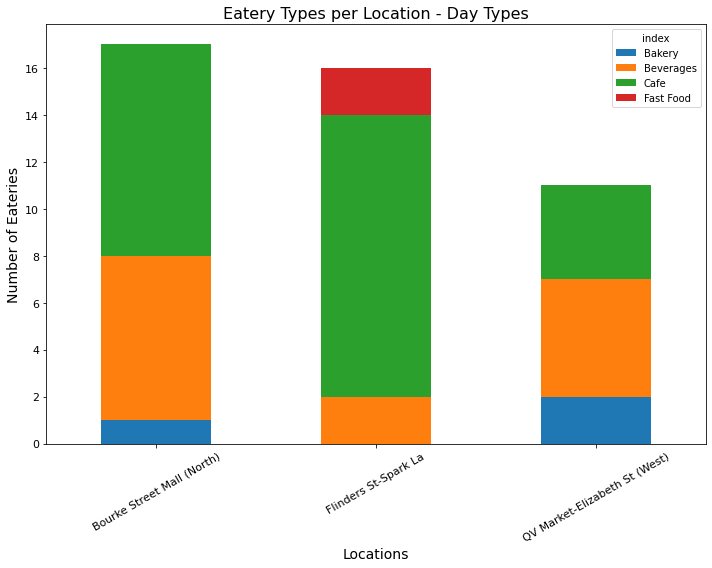

In [15]:
# Create a stacked bar chart to compare total daytime eateries per location
count_chart_d = sensors_day.plot.bar(stacked=True, rot=30,fontsize=11, figsize=(10,8))

# Set the xlabel and ylabel using class methods
count_chart_d.set_xlabel("Locations", fontsize=14)
count_chart_d.set_ylabel("Number of Eateries",fontsize=14)
count_chart_d.set_title("Eatery Types per Location - Day Types", fontsize=16)
plt.tight_layout()
count_chart_d.get_figure()
count_chart_d.figure.savefig("../../Output/types_bar_stacked_day.png")

plt.show()


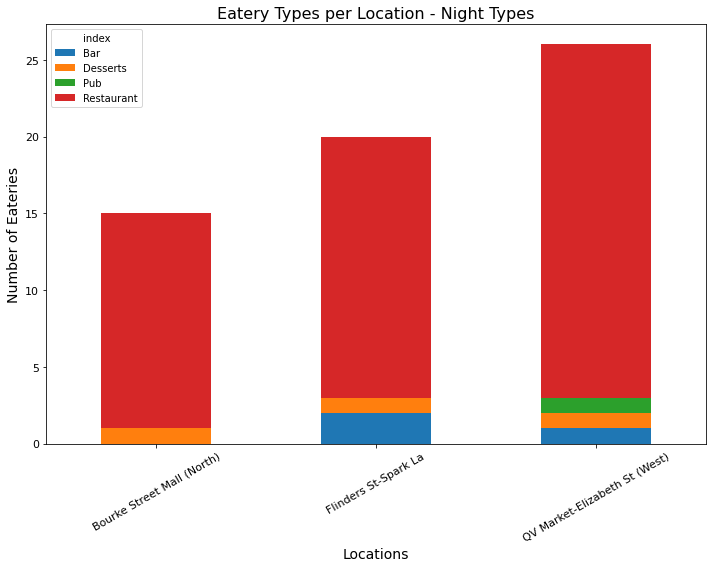

In [16]:
# Create a stacked bar chart to compare total nighttime eateries per location
count_chart_n = sensors_night.plot.bar(stacked=True, rot=30,fontsize=11, figsize=(10,8))

# Set the xlabel and ylabel using class methods
count_chart_n.set_xlabel("Locations", fontsize=14)
count_chart_n.set_ylabel("Number of Eateries",fontsize=14)
count_chart_n.set_title("Eatery Types per Location - Night Types", fontsize=16)
plt.tight_layout()
count_chart_n.get_figure()
#count_chart.figure.savefig("types_bar_separate.png")
count_chart_n.figure.savefig("../../Output/types_bar_stacked_night.png")

plt.show()


In [17]:
# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [18]:
# Get list of types for reference
types

array(['Bakery', 'Bar', 'Beverages', 'Cafe', 'Desserts', 'Fast Food',
       'Pub', 'Restaurant'], dtype=object)

In [19]:
# Filter dataframe based on eatery types
bakery_df = df.loc[df["Type"]=="Bakery",:]
bar_df = df.loc[df["Type"]=="Bar",:]
beverages_df = df.loc[df["Type"]=="Beverages",:]
cafe_df = df.loc[df["Type"]=="Cafe",:]
desserts_df = df.loc[df["Type"]=="Desserts",:]
fast_food_df = df.loc[df["Type"]=="Fast Food",:]
pub_df = df.loc[df["Type"]=="Pub",:]
restaurants_df = df.loc[df["Type"]=="Restaurant",:]


In [20]:
# set variables for dataframes by type holding only latitude and longitude data.
locations_bakery = bakery_df[["Latitude", "Longitude"]]
locations_bar = bar_df[["Latitude", "Longitude"]]
locations_beverages = beverages_df[["Latitude", "Longitude"]]
locations_cafe = cafe_df[["Latitude", "Longitude"]]
locations_desserts = desserts_df[["Latitude", "Longitude"]]
locations_fast_food = fast_food_df[["Latitude", "Longitude"]]
locations_pub = pub_df[["Latitude", "Longitude"]]
locations_restaurants = restaurants_df[["Latitude", "Longitude"]]

In [21]:
# test one of the dataframes to confirm success
locations_cafe

,Latitude,Longitude
0,-37.813075,144.965281
2,-37.813398,144.964499
6,-37.813165,144.965886
12,-37.814117,144.965801
21,-37.814833,144.972896
25,-37.814372,144.973065
26,-37.814471,144.972929
29,-37.814337,144.972831
33,-37.814324,144.972700
47,-37.808025,144.960451


In [22]:
# Plot dayttime eateries on a Google Map

# Assign the marker layer to a variable
markers_0 = gmaps.symbol_layer(locations_bakery,fill_color='rgba(0, 150, 0, 0.4)', stroke_color='rgba(0, 150, 0, 0.4)')
markers_1 = gmaps.symbol_layer(locations_beverages,fill_color='rgba(50, 150, 0, 0.4)', stroke_color='rgba(50, 150, 0, 0.4)')
markers_2 = gmaps.symbol_layer(locations_cafe,fill_color='rgba(0, 100, 50, 0.4)', stroke_color='rgba(0, 100, 50, 0.4)')
markers_3 = gmaps.symbol_layer(locations_fast_food,fill_color='rgba(90, 0, 40, 0.4)', stroke_color='rgba(90, 0, 40, 0.4)')

# Plot Heatmap
fig = gmaps.figure()

# Add marker layer ontop of heat map
fig.add_layer(markers_0)
fig.add_layer(markers_1)
fig.add_layer(markers_2)
fig.add_layer(markers_3)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [23]:
# Plot nighttime eateries on a Google Map

# Assign the marker layer to a variable
markers_4 = gmaps.symbol_layer(locations_bar,fill_color='rgba(0, 150, 0, 0.4)', stroke_color='rgba(0, 150, 0, 0.4)')
markers_5 = gmaps.symbol_layer(locations_desserts,fill_color='rgba(50, 150, 0, 0.4)', stroke_color='rgba(50, 150, 0, 0.4)')
markers_6 = gmaps.symbol_layer(locations_pub,fill_color='rgba(0, 100, 50, 0.4)', stroke_color='rgba(0, 100, 50, 0.4)')
markers_7 = gmaps.symbol_layer(locations_restaurants,fill_color='rgba(90, 0, 40, 0.4)', stroke_color='rgba(90, 0, 40, 0.4)')

# Plot Heatmap
fig = gmaps.figure()

# Add marker layer ontop of heat map
fig.add_layer(markers_4)
fig.add_layer(markers_5)
fig.add_layer(markers_6)
fig.add_layer(markers_7)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [25]:
# import pedestrian sensor data 
locations_df = pd.read_csv("../../Output/1_pedestrian_csv/sensors2019_chosen3_dailyaverage.csv")
locations_df

,Bourke Street Mall (North),Flinders St-Spark La,QV Market-Elizabeth St (West)
0,1119.375000,117.791667,363.500000
1,1504.125000,185.708333,586.250000
2,1458.750000,154.833333,551.000000
3,1283.727273,138.818182,512.181818
4,1384.791667,180.416667,588.875000
...,...,...,...
358,1438.166667,138.791667,577.958333
359,1133.666667,133.625000,383.375000
360,1304.083333,146.083333,583.583333
361,1299.125000,105.333333,633.041667


In [26]:
# find average daily pedestrian count per location
locations_df = locations_df.mean()

In [27]:
# convert into dataframe for merging
locations_df = pd.DataFrame(locations_df)
locations_df = locations_df.rename(columns={0:'Daily Average'})

In [28]:
# merge location data with day and night dataframes
merged_day = pd.merge(sensors_day,locations_df,left_index=True, right_index=True, how="outer")
merged_night = pd.merge(sensors_night,locations_df,left_index=True, right_index=True, how="outer")

In [29]:
# list types for day and nighttime eateries
day_types = list(sensors_day.columns)
night_types = list(sensors_night.columns)
day_types, night_types

(['Bakery', 'Beverages', 'Cafe', 'Fast Food'],
 ['Bar', 'Desserts', 'Pub', 'Restaurant'])

In [30]:
# define variables for scatter plot
foot_traffic = locations_df["Daily Average"]

# define variables for ANOVA
day_0 = merged_day[day_types[0]]
day_1 = merged_day[day_types[1]]
day_2 = merged_day[day_types[2]]
day_3 = merged_day[day_types[3]]
night_0 = merged_night[night_types[0]]
night_1 = merged_night[night_types[1]]
night_2 = merged_night[night_types[2]]
night_3 = merged_night[night_types[3]]


In [31]:
# linear regression of price rating relative to location
price_slope, price_int, price_r, price_p, price_std_err = stats.linregress(foot_traffic_big, price_big)
price_fit = price_slope * foot_traffic_big + price_int

# scatter plot by price
plt.scatter(foot_traffic_big, price_big, marker="o", facecolors="blue", edgecolors="black", alpha=0.1)
plt.xlabel("Daily Average Pedestrian Count")
plt.ylabel("Averaged Price Rating")
plt.title("Aggregate Price Rating vs Average Daily Pedestrian Count in 2019")
plt.plot(foot_traffic_big,price_fit,"--")
plt.savefig("../../Output/price_per_pedestrian.png")
plt.show()
print(f"r value = {price_r}")
print(f"r squared = {price_r**2}")

NameError: name 'foot_traffic_big' is not defined

r-value for Bakery = 0.3767666778529607
r-squared value for Bakery = 0.14195312954035666
r-value for Beverages = 0.9683517046364798
r-squared value for Beverages = 0.9377050238723762
r-value for Cafe = -0.2405725600656459
r-squared value for Cafe = 0.0578751566565388
r-value for Fast Food = -0.7894436113708984
r-squared value for Fast Food = 0.623221215534326


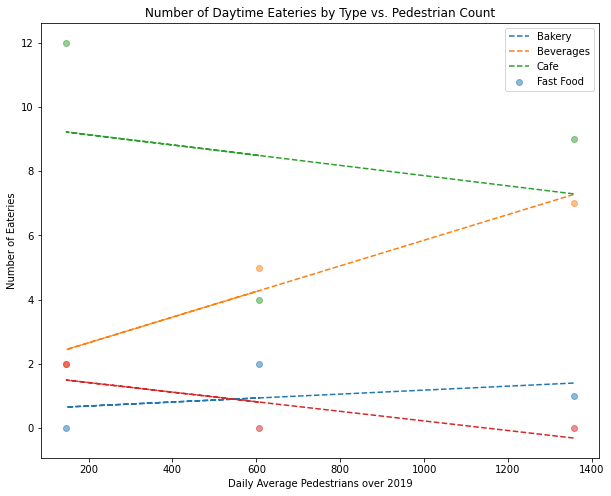

In [32]:
count=1
plt.subplots(figsize=(10, 8))
for i in day_types:
    # linear regression of price rating relative to location
    i_slope, i_int, i_r, i_p, i_std_err = stats.linregress(foot_traffic, sensors_day[i])
    i_fit = i_slope * foot_traffic + i_int
    plt.scatter(foot_traffic,sensors_day[i],alpha=.5)
    plt.legend(day_types)
    plt.plot(foot_traffic,i_fit,"--")
    print(f"r-value for {day_types[(count-1)]} = {i_r}")
    print(f"r-squared value for {day_types[(count-1)]} = {i_r**2}")
    count+=1
plt.xlabel("Daily Average Pedestrians over 2019")
plt.ylabel("Number of Eateries")
plt.title("Number of Daytime Eateries by Type vs. Pedestrian Count")
plt.savefig("../../Output/type_scatter_day.png")
plt.show()

In [33]:
# Perform the ANOVA
day_s, day_p = stats.f_oneway(day_0,day_1,day_2,day_3)

if day_p < 0.05:
    print(f"Given the p-value of {day_p} is less than 0.05, we therefore may reject the null hypothesis.")
else:
    print(f"Given the p-value of {day_p} is greater than 0.05, we therefore may retain the null hypothesis." )

Given the p-value of 0.017368944461557442 is less than 0.05, we therefore may reject the null hypothesis.


r-value for Bar = -0.9905897667520948
r-squared value for Bar = 0.9812680859939695
r-value for Desserts = 0.0
r-squared value for Desserts = 0.0
r-value for Pub = -0.13686458273063476
r-squared value for Pub = 0.018731914006030765
r-value for Restaurant = -0.45357148819853915
r-squared value for Restaurant = 0.20572709490663754


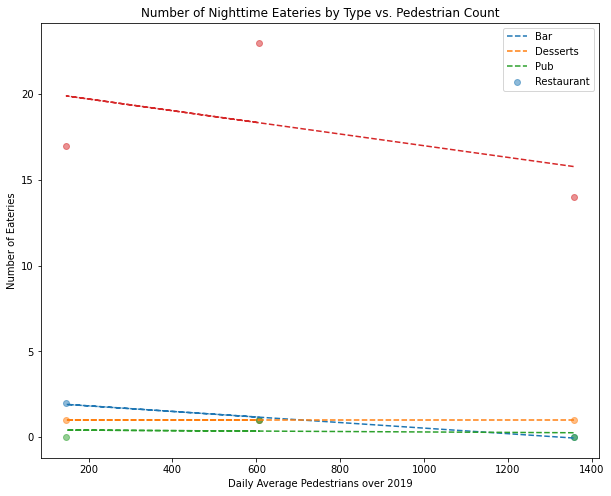

In [34]:
count=1
plt.subplots(figsize=(10, 8))
for j in night_types:
    # linear regression of price rating relative to location
    j_slope, j_int, j_r, j_p, j_std_err = stats.linregress(foot_traffic, sensors_night[j])
    j_fit = j_slope * foot_traffic + j_int
    plt.scatter(foot_traffic,sensors_night[j],alpha=.5)
    plt.legend(night_types)
    plt.plot(foot_traffic,j_fit,"--")
    print(f"r-value for {night_types[(count-1)]} = {j_r}")
    print(f"r-squared value for {night_types[(count-1)]} = {j_r**2}")
    count+=1
plt.xlabel("Daily Average Pedestrians over 2019")
plt.ylabel("Number of Eateries")
plt.title("Number of Nighttime Eateries by Type vs. Pedestrian Count")
plt.savefig("../../Output/type_scatter_night.png")
plt.show()

In [35]:
# Perform the ANOVA
night_s, night_p = stats.f_oneway(night_0,night_1,night_2,night_3)

if night_p < 0.05:
    print(f"Given the p-value of {night_p} is less than 0.05, we therefore may reject the null hypothesis.")
else:
    print(f"Given the p-value of {night_p} is greater than 0.05, we therefore may retain the null hypothesis." )

Given the p-value of 3.695789016197013e-05 is less than 0.05, we therefore may reject the null hypothesis.
